In [51]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB

In [76]:
import pandas as pd
data = pd.read_csv('../best.txt', delim_whitespace=True,nrows=38)
array = data.values

print(data.shape)
data.columns=['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10','col11','col12','col13','col14','col15','col16','col17']
#data['x'],data['y'],data['z'],data['nx'],data['ny']=data['col2'].str.split('-')
z = data['col2'].str.split('-')
data['col13']=data['col13'].eq("enable").mul(1)
data['col14']=data['col14'].eq("enable").mul(1)

(38, 17)
(38, 7)


In [84]:
X = pd.DataFrame(z.tolist())
Y = data['col8']

msk = np.random.rand(len(X)) < 0.8
train_X = X[msk]
test_X = X[~msk]
train_Y = Y[msk]
test_Y = Y[~msk]

y = train_Y.values
X = train_X.values

y = y.astype(int)
X = X.astype(int)
print(y.shape, X.shape)

(29,) (29, 7)


In [90]:
hasher = RandomTreesEmbedding(n_estimators=10, random_state=0, max_depth=3)
X_transformed = hasher.fit_transform(train_X)
X_transformed

<29x77 sparse matrix of type '<class 'numpy.float64'>'
	with 290 stored elements in Compressed Sparse Row format>

In [91]:
y = y*100

In [92]:
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X_transformed)


In [93]:
nb = BernoulliNB()
nb.fit(X_transformed, y)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [94]:
trees = ExtraTreesClassifier(max_depth=3, n_estimators=10, random_state=0)
trees.fit(X, y)



ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=3, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

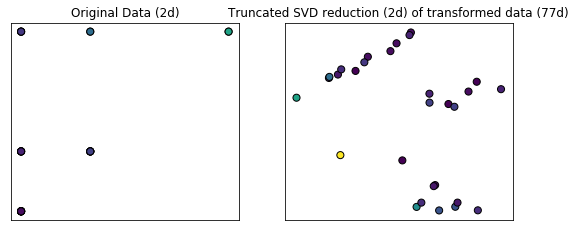

In [95]:
fig = plt.figure(figsize=(9, 8))

ax = plt.subplot(221)
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
ax.set_title("Original Data (2d)")
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(222)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=50, edgecolor='k')
ax.set_title("Truncated SVD reduction (2d) of transformed data (%dd)" %
             X_transformed.shape[1])
ax.set_xticks(())
ax.set_yticks(())

# Plot the decision in original space. For that, we will assign a color
# to each point in the mesh [x_min, x_max]x[y_min, y_max].
h = .01
x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max() 
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [96]:
X[:, 0].min()

100

In [101]:
print(trees.predict(test_X))
print(test_X, test_Y)

[310000  10000  10000  40000  10000  60000 310000  40000  30000]
      0    1    2  3  4  5  6
14  400  400  400  4  4  4  1
15  100  100  200  4  4  8  1
18  100  100  400  4  4  8  1
19  100  200  400  4  4  8  1
25  100  200  200  2  4  4  1
30  200  400  400  2  4  4  1
32  400  400  400  2  4  4  1
35  200  200  400  4  4  8  1
37  200  200  400  4  4  4  1 14    23.62
15     1.20
18     1.97
19     2.83
25     1.78
30    10.82
32    24.12
35     4.25
37     6.49
Name: col8, dtype: float64
